<a href="https://colab.research.google.com/github/ManarHelmy/Retinal-Disease/blob/main/OCT_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OCT: Optical Coherence Tomography - Eyes Diseases Diagnosis**



---
class 0 = CNV

class 1 = DME

class 2 = Drusen

class 3 = Normal

In [ ]:
!pip install Kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


In [ ]:
!kaggle datasets download -d paultimothymooney/kermany2018

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/kermany2018
License(s): CC-BY-NC-SA-4.0
100% 10.8G/10.8G [01:50<00:00, 111MB/s]
100% 10.8G/10.8G [01:50<00:00, 105MB/s]


In [ ]:
!unzip /content/kermany2018.zip

Streaming output truncated to the last 5000 lines.
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8050636-2.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-1.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-2.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-3.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-1.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-2.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-3.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-1.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-2.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-3.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-4.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-5.jpeg  
  inflating: 

In [ ]:
classes = {0 : 'CNV',
           1 : 'DME',
           2 : 'Drusen',
           3 : 'Normal'}

In [ ]:
classes[0]

'CNV'

importing libraries

In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade keras

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential
from keras.layers import Dense,Input,Flatten
from tensorflow.keras.utils import load_img,img_to_array
from sklearn.metrics import confusion_matrix

In [ ]:
import os
os.listdir('/content/oct2017/OCT2017 /train')

['NORMAL', 'DRUSEN', 'DME', 'CNV']

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_data = train_datagen.flow_from_directory('/content/oct2017/OCT2017 /train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset='training')
test_data = train_datagen.flow_from_directory('/content/oct2017/OCT2017 /train',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False,
                                              subset='validation')

Found 75138 images belonging to 4 classes.
Found 8346 images belonging to 4 classes.


In [ ]:
train_data.image_shape

(224, 224, 3)

In [ ]:
np.unique(test_data.labels)

array([0, 1, 2, 3], dtype=int32)

In [ ]:
train_data.class_indices

{'CNV': 0, 'DME': 1, 'DRUSEN': 2, 'NORMAL': 3}

---

# **Modeling**

# Inception v3 Architecture
(best accuracy)

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.layers import Input
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler, ReduceLROnPlateau
from keras.optimizers import SGD
from keras.regularizers import l2
import keras.backend as K
import math

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

x = base_model.output
x = AveragePooling2D(pool_size=(2, 2))(x)
x = Dropout(.5)(x)
x = Flatten()(x)
x = Dense(4, kernel_initializer='glorot_uniform', kernel_regularizer=l2(.0005), activation='softmax')(x)
model2 = Model(inputs=base_model.input, outputs=x)
model2.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 21,835,556 (83.30 MB)

 Trainable params: 21,801,124 (83.16 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [ ]:
# Change 'lr' to 'learning_rate' in the SGD optimizer initialization
opt = SGD(learning_rate=.1, momentum=.9)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
results2 = model2.fit(train_data, epochs=10, validation_data=test_data,
                  steps_per_epoch=len(train_data), validation_steps=len(test_data),
                  callbacks = EarlyStopping(patience=3, monitor='val_accuracy',restore_best_weights=True)
                  )

Epoch 1/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 554s 236ms/step - accuracy: 0.9265 - loss: 0.2362 - val_accuracy: 0.9289 - val_loss: 0.2294
Epoch 2/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 561s 235ms/step - accuracy: 0.9347 - loss: 0.2098 - val_accuracy: 0.9136 - val_loss: 0.3154
Epoch 3/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 565s 237ms/step - accuracy: 0.9427 - loss: 0.1882 - val_accuracy: 0.8863 - val_loss: 0.4544
Epoch 4/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 557s 237ms/step - accuracy: 0.9448 - loss: 0.1783 - val_accuracy: 0.9153 - val_loss: 0.2722


In [ ]:
loss2, acc2 = model2.evaluate(test_data)

261/261 ━━━━━━━━━━━━━━━━━━━━ 32s 120ms/step - accuracy: 0.9417 - loss: 0.1747


In [ ]:
print("Inception v3")
print("Test Accuracy:",round(acc2*100,2),"%","\nTest Loss:",loss2)

Inception v3
Test Accuracy: 92.89 % 
Test Loss: 0.22938206791877747


In [ ]:
results2.history['val_loss']

[0.22938206791877747,
 0.3153950870037079,
 0.45439445972442627,
 0.2722409665584564]

In [ ]:
results2.history['val_accuracy']

[0.9289479851722717,
 0.9136112928390503,
 0.8862928152084351,
 0.9152887463569641]

In [ ]:
i = results2.history['val_loss'].index(loss2)
i

0

In [ ]:
results2.history['val_accuracy'][i]

0.9289479851722717

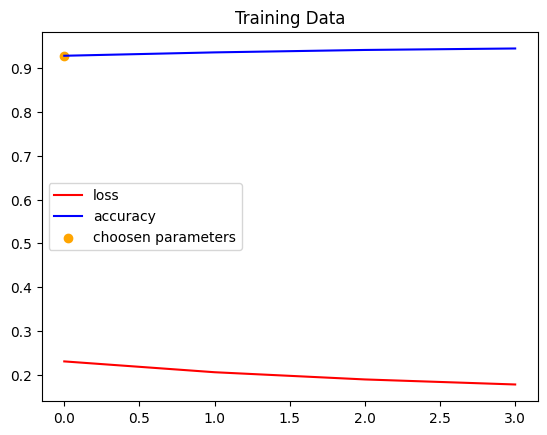

In [ ]:
fig = plt.figure()
plt.plot(results2.history['loss'], c='red', label='loss')
plt.plot(results2.history['accuracy'], c='blue', label='accuracy')
plt.scatter(i ,results2.history['accuracy'][i], c='orange', label='choosen parameters', marker='o')
plt.title("Training Data")
plt.legend(loc="center left")
plt.show()

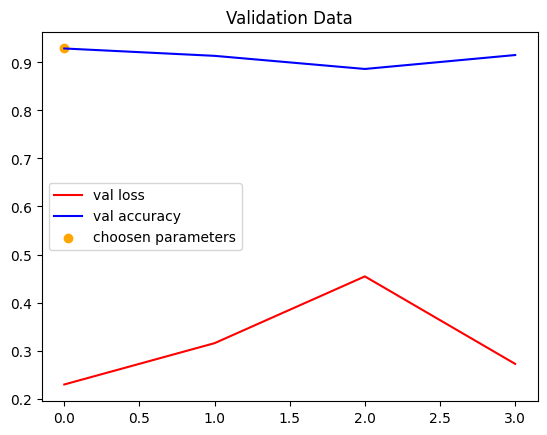

In [ ]:
fig = plt.figure()
plt.plot(results2.history['val_loss'], c='red', label='val loss')
plt.plot(results2.history['val_accuracy'], c='blue', label='val accuracy')
plt.scatter(i ,results2.history['val_accuracy'][i], c='orange', label='choosen parameters', marker='o')
plt.title("Validation Data")
plt.legend(loc="center left")
plt.show()

---

In [ ]:
yp = model2.predict(test_data)
yp

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


261/261 ━━━━━━━━━━━━━━━━━━━━ 47s 150ms/step


array([[9.9960715e-01, 1.1947566e-05, 3.7748742e-04, 3.3795923e-06],
       [9.9861419e-01, 2.0475609e-05, 1.3533378e-03, 1.2014762e-05],
       [6.6554302e-01, 4.3404445e-02, 2.8724346e-01, 3.8089927e-03],
       ...,
       [7.8359805e-04, 3.5557984e-03, 1.8833771e-02, 9.7682685e-01],
       [3.0828724e-04, 1.5512162e-03, 1.1820304e-02, 9.8632020e-01],
       [1.2949571e-03, 8.4606446e-03, 2.1632615e-02, 9.6861178e-01]],
      dtype=float32)

In [ ]:
yp = yp.argmax(axis=1)
yp

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
yp.shape

(8346,)

Text(0.5, 1.0, 'CNV Sample')

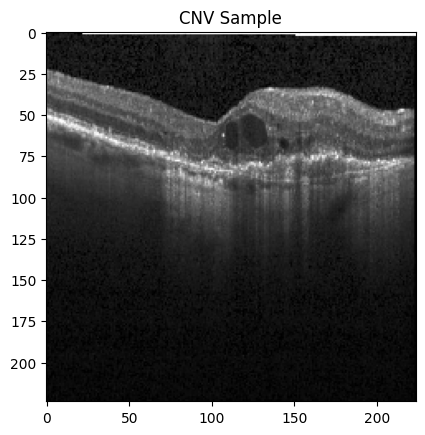

In [ ]:
cnv = load_img('/content/oct2017/OCT2017 /test/CNV/CNV-103044-2.jpeg',target_size=(224,224))
plt.imshow(cnv)
plt.title('CNV Sample')

Text(0.5, 1.0, 'DME Sample')

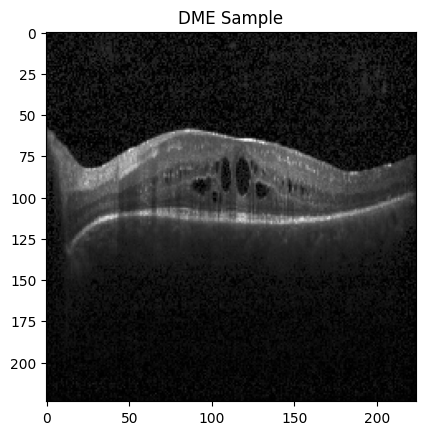

In [ ]:
dme = load_img('/content/oct2017/OCT2017 /test/DME/DME-1274315-1.jpeg',target_size=(224,224))
plt.imshow(dme)
plt.title('DME Sample')

Text(0.5, 1.0, 'Drusen Sample')

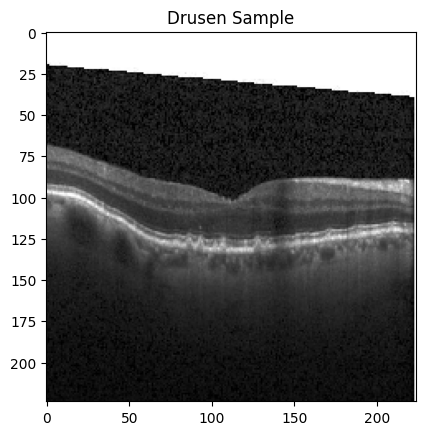

In [ ]:
dru = load_img('/content/oct2017/OCT2017 /test/DRUSEN/DRUSEN-1237848-2.jpeg',target_size=(224,224))
plt.imshow(dru)
plt.title('Drusen Sample')

Text(0.5, 1.0, 'Normal Sample')

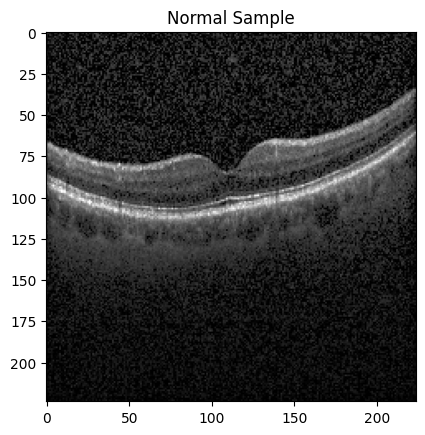

In [ ]:
n = load_img('/content/oct2017/OCT2017 /test/NORMAL/NORMAL-1025847-1.jpeg',target_size=(224,224))
plt.imshow(n)
plt.title('Normal Sample')

Text(0.5, 1.0, 'Normal')

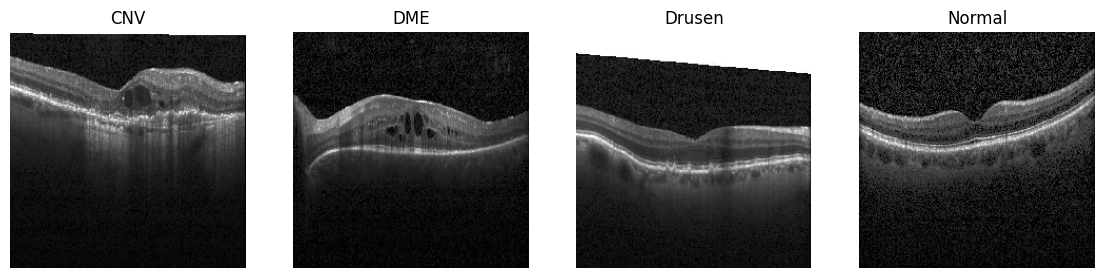

In [ ]:
fig = plt.figure(figsize=(14,7))
# plt.grid=False
fig.add_subplot(1, 4, 1)
plt.axis('off')
plt.imshow(cnv)
plt.title('CNV')
# _______________________________
fig.add_subplot(1, 4, 2)
plt.axis('off')
plt.imshow(dme)
plt.title('DME')
# _______________________________
fig.add_subplot(1, 4, 3)
plt.axis('off')
plt.imshow(dru)
plt.title('Drusen')
# _______________________________
fig.add_subplot(1, 4, 4)
plt.axis('off')
plt.imshow(n)
plt.title('Normal')

In [ ]:
cnv = img_to_array(cnv)
n = img_to_array(n)
dme = img_to_array(dme)
dru = img_to_array(dru)
cnv = cnv/255
n = n/255
dme = dme/255
dru = dru/255
cnv = cnv.reshape(1,224,224,3)
n = n.reshape(1,224,224,3)
dme = dme.reshape(1,224,224,3)
dru = dru.reshape(1,224,224,3)
cnv.shape

(1, 224, 224, 3)

In [ ]:
p1 = model2.predict(cnv).argmax()
print("Actual: CNV")
print("Predicted: Class ",p1,": ",classes[p1],sep='')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Actual: CNV
Predicted: Class 0: CNV


In [ ]:
p1 = model2.predict(dme).argmax()
print("Actual: DME")
print("Predicted: Class ",p1,": ",classes[p1],sep='')

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Actual: DME
Predicted: Class 1: DME


In [ ]:
p1 = model2.predict(dru).argmax()
print("Actual: Drusen")
print("Predicted: Class ",p1,": ",classes[p1],sep='')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Actual: Drusen
Predicted: Class 2: Drusen


In [ ]:
p1 = model2.predict(n).argmax()
print("Actual: Normal")
print("Predicted: Class ",p1,": ",classes[p1],sep='')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Actual: Normal
Predicted: Class 3: Normal


In [ ]:
df = pd.DataFrame({'filename':test_data.filenames,'y_actual':test_data.classes,'Y_pred':yp})
df

,filename,y_actual,Y_pred
0,CNV/CNV-1016042-1.jpeg,0,0
1,CNV/CNV-1016042-10.jpeg,0,0
2,CNV/CNV-1016042-100.jpeg,0,0
3,CNV/CNV-1016042-101.jpeg,0,0
4,CNV/CNV-1016042-102.jpeg,0,0
...,...,...,...
8341,NORMAL/NORMAL-1938649-1.jpeg,3,3
8342,NORMAL/NORMAL-1938707-1.jpeg,3,3
8343,NORMAL/NORMAL-1939090-1.jpeg,3,3
8344,NORMAL/NORMAL-1939090-2.jpeg,3,3


In [ ]:
test_data.labels

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [ ]:
m = confusion_matrix(test_data.labels,yp)
m

array([[3586,   18,  104,   12],
       [  53,  970,   18,   93],
       [  67,    6,  677,  111],
       [  17,   24,   70, 2520]])

Heatmap



<Axes: xlabel='Predicted', ylabel='Actual'>

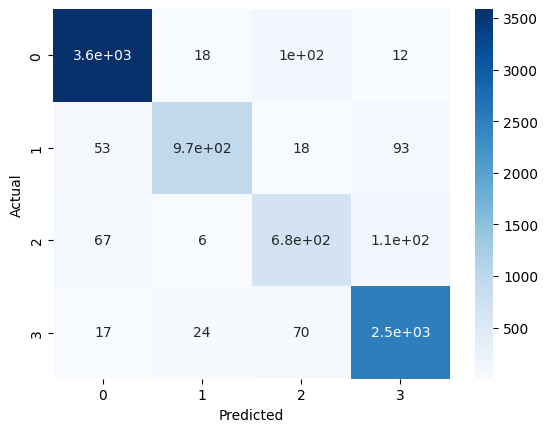

In [ ]:
print("Heatmap\n")
m = pd.crosstab(test_data.labels, yp, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(m,annot=True, cmap='Blues')

---

In [ ]:
model2.save('oct_model.h5')